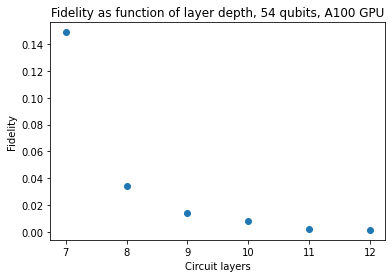

In [1]:
import matplotlib.pyplot as plt

x = [7, 8, 9, 10, 11, 12]
y = [0.148950902986765, 0.0342874052065866, 0.0142989719179139, 0.00805297090687572, 0.00192726740030793, 0.00144596133381587]

plt.scatter(x, y)
plt.title("Fidelity as function of layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel("Fidelity")
plt.show()

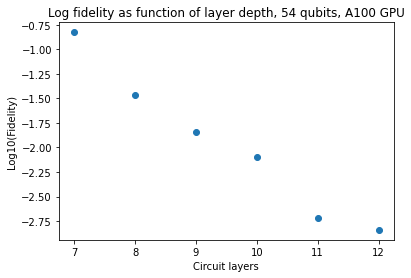

In [2]:
import numpy as np

yLog = np.log10(y)

plt.scatter(x, yLog)
plt.title("Log fidelity as function of layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel("Log10(Fidelity)")
plt.show()

<Figure size 1008x1008 with 0 Axes>

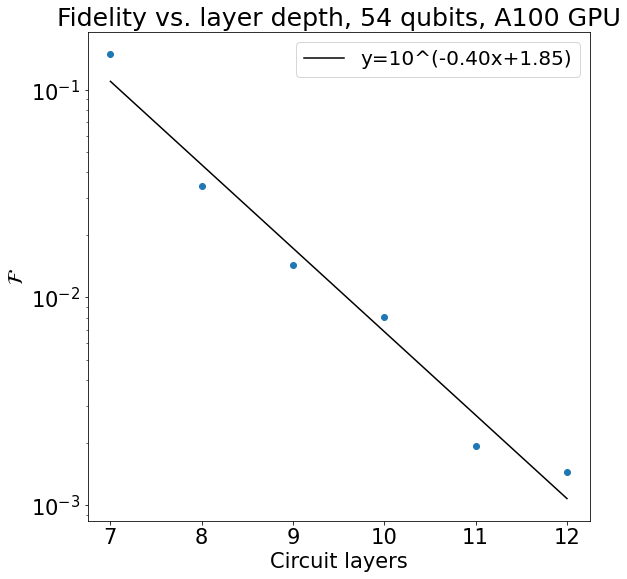

In [3]:
fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=20)
plt.rcParams.update({'font.size': 21})

fig, ax = plt.subplots(figsize = (9, 9))
plt.title("Fidelity vs. layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel(r"$\mathcal{F}$")
plt.yscale("log")

ax.scatter(x, y)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, yLog)

line = 10 ** (slope*np.array(x)+intercept)
ax.plot(x, line, 'k', label='y=10^({:.2f}x+{:.2f})'.format(slope,intercept))
plt.legend()

fig.savefig('noisy_a100.png', dpi=100)

In [4]:
sse = 0
sst = 0
for i in range(len(yLog)):
    o = yLog[i]
    sst += o * o
    res = (o - (intercept + slope * (i + 7)))
    sse += res * res

print("slope: ", slope)
print("intercept: ", intercept)
print("R-squared: ", (1 - sse / sst))

slope:  -0.40183882628821754
intercept:  1.8532250762012126
R-squared:  0.9969857017681901
